In [1]:
#ANN IMPLENTATION

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [4]:
##import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## divide the dataset into independent and dependnent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
## feature engineering
## one hot encoding
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
## concatenate these variables with the dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
## splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
## feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
## part 2 now lets create an ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
## Lets initialize the ann
classifier=Sequential()

In [20]:
## adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [21]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [22]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [23]:

## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
## early stopping
import keras

early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [27]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7914 - loss: 0.4925 - val_accuracy: 0.8300 - val_loss: 0.4134
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8385 - loss: 0.4049 - val_accuracy: 0.8383 - val_loss: 0.3884
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8411 - loss: 0.3773 - val_accuracy: 0.8504 - val_loss: 0.3657
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8526 - loss: 0.3615 - val_accuracy: 0.8497 - val_loss: 0.3716
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8589 - loss: 0.3564 - val_accuracy: 0.8425 - val_loss: 0.3730
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8468 - loss: 0.3661 - val_accuracy: 0.8413 - val_loss: 0.3700
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8472 - loss: 0.3701 - val_accuracy: 0.8459 - val_loss: 0.3722
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.3524 

In [28]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

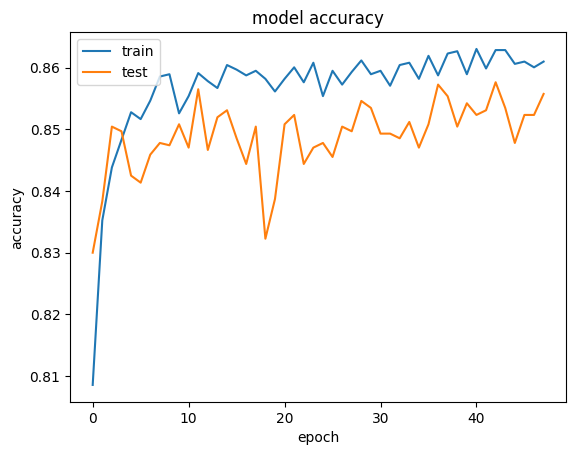

In [29]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

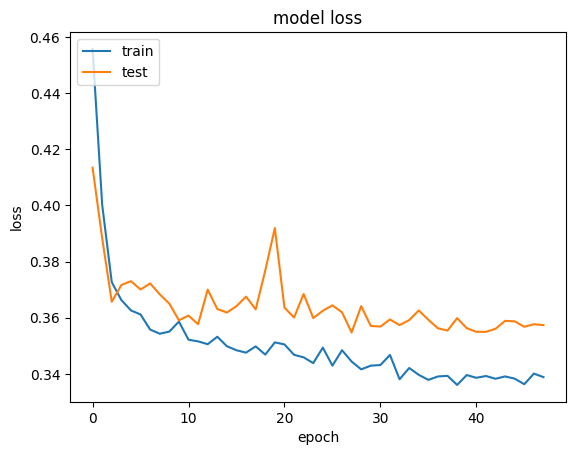

In [30]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
## part 3 making the predictions and evaluating the model
## predicting the test set results

y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[1543,   52],
       [ 212,  193]])

In [34]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [35]:
score

0.868

In [36]:
## get the weights
classifier.get_weights()

[array([[-4.79269326e-01,  1.48920584e+00,  1.43545449e-01,
         -7.42165387e-01,  1.15463026e-01, -1.27070010e+00,
          1.78992510e-01, -1.26449034e-01,  4.14867818e-01,
          2.48265088e-01,  1.21198215e-01],
        [ 1.53994274e+00, -7.64121830e-01,  8.69724035e-01,
          2.37765670e+00, -3.81281400e+00, -1.87534726e+00,
         -4.74596888e-01,  2.06614518e+00, -3.29371881e+00,
         -3.00172162e+00, -2.05119157e+00],
        [-1.75007179e-01,  3.14314872e-01, -7.45887697e-01,
          5.05936623e-01,  2.35894427e-01, -4.98909920e-01,
          7.27368519e-04, -1.00031602e+00, -1.30093813e-01,
          1.44567534e-01, -3.66824001e-01],
        [-2.27212095e+00, -7.07613528e-01,  2.44994235e+00,
         -4.83330160e-01,  9.70831692e-01,  1.34756398e+00,
          1.70277253e-01, -1.22874522e+00, -2.15872335e+00,
         -3.44332725e-01, -5.96979022e-01],
        [-3.49932027e+00,  1.35502970e+00,  2.18464494e+00,
          2.56145805e-01,  1.55326098e-01,  